# Description
Perform agglomerative clustering and k-means clustering over a dataset dealing with European employment in 1979 at http://www.dm.unibo.it/~simoncin/EuropeanJobs.html. This dataset gives the percentage of people employed in each of a set of areas in 1979 for each of a set of European countries.

# Imports

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Data

Variable Names:
- `Country`: Name of country
- `Agr`: Percentage employed in agriculture
- `Min`: Percentage employed in mining
- `Man`: Percentage employed in manufacturing
- `PS`: Percentage employed in power supply industries
- `Con`: Percentage employed in construction
- `SI`: Percentage employed in service industries
- `Fin`: Percentage employed in finance
- `SPS`: Percentage employed in social and personal services
- `TC`: Percentage employed in transport and communications

In [4]:
df = pd.read_csv("Data/EuropeanJobs.dat", sep='\t', header=0)

In [5]:
df

,Country,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7
3,W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1
5,Italy,15.9,0.6,27.6,0.5,10.0,18.1,1.6,20.1,5.7
6,Luxembourg,7.7,3.1,30.8,0.8,9.2,18.5,4.6,19.2,6.2
7,Netherlands,6.3,0.1,22.5,1.0,9.9,18.0,6.8,28.5,6.8
8,United Kingdom,2.7,1.4,30.2,1.4,6.9,16.9,5.7,28.3,6.4
9,Austria,12.7,1.1,30.2,1.4,9.0,16.8,4.9,16.8,7.0


Get features columns and label:

In [6]:
feature_cols = ['Agr','Min','Man','PS','Con','SI','Fin','SPS','TC'] 
X = df[feature_cols].values
Y = df['Country'].tolist()

# Agglomerative Clustering

## Inter-cluster distance
For agglomerative clustering, we need to choose a good inter-cluster distance to fuse nearby clusters. Lets find out wich one is the best for our dataset by producing a dendrogram of this data for each distance.

Every function should take the data matrix X as input, which is a numpy array with the shape of  (𝑁,𝑑)  where  𝑁  is the number of samples and  𝑑  is the number of features. The output of the function should be a linkage matrix.

### Single-link

In [7]:
def single_linkage(X):
    single_link = hierarchy.single(X)
    
    return single_link

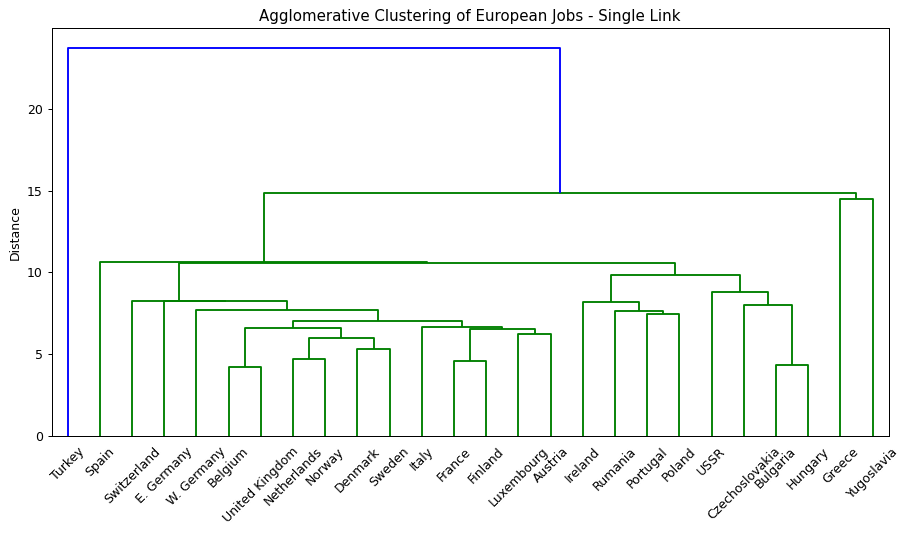

In [8]:
single_link = single_linkage(X)
plt.figure(figsize=(12,6), dpi=90)
plt.ylabel("Distance")
plt.title("Agglomerative Clustering of European Jobs - Single Link")
dn_single = hierarchy.dendrogram(single_link, labels=Y)

### Complete-link

In [9]:
def complete_linkage(X):
    comp_link = hierarchy.complete(X)
    
    return comp_link

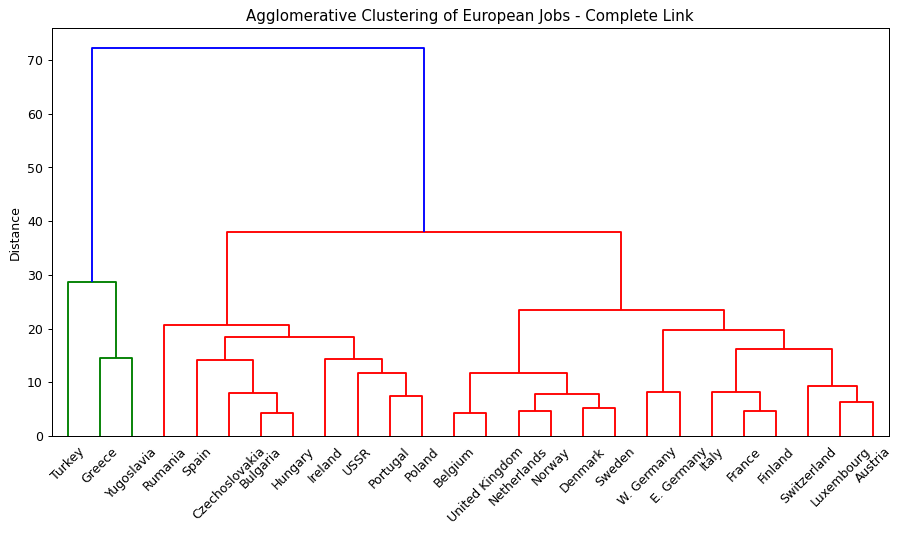

In [10]:
complete_link = complete_linkage(X)
plt.figure(figsize=(12,6), dpi=90)
plt.ylabel("Distance")
plt.title("Agglomerative Clustering of European Jobs - Complete Link")
dn_complete = hierarchy.dendrogram(complete_link,labels=Y)

### Average-link

In [11]:
def group_avg_linkage(X):
    avg_link = hierarchy.average(X)
    
    return avg_link

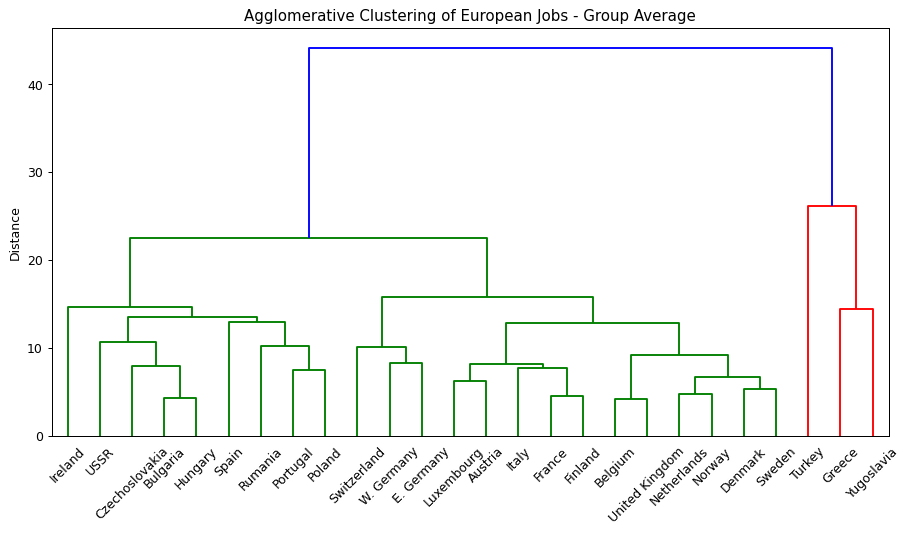

In [12]:
average_link = group_avg_linkage(X)
plt.figure(figsize=(12,6), dpi=90)
plt.ylabel("Distance")
plt.title("Agglomerative Clustering of European Jobs - Group Average")
dn_average = hierarchy.dendrogram(average_link,labels=Y)

# K-mans clustreing

Perform the K-Means clustering algorithm on the dataset, and evalute the effect of the parameter  𝑘  (the number of clusters) on the outcome.

In the following code, the K-Means algorithm is for  2≤𝑘≤25  clusters.

In [16]:
k_list = list(range(2,26))
k_inertias = []
k_scores = []
model_list = []
for k in k_list:
    model = KMeans(n_clusters=k, random_state=12345).fit(X)
    model_list.append(model)
    cluster_assignments = model.labels_
    score = silhouette_score(X, cluster_assignments, metric='euclidean')
    inertia = model.inertia_
    k_scores.append(score)
    k_inertias.append(inertia)

## Elbow plot
Plot the sum of square distances of samples to their closest cluster center as a function of  𝑘 , the numebr of clusters

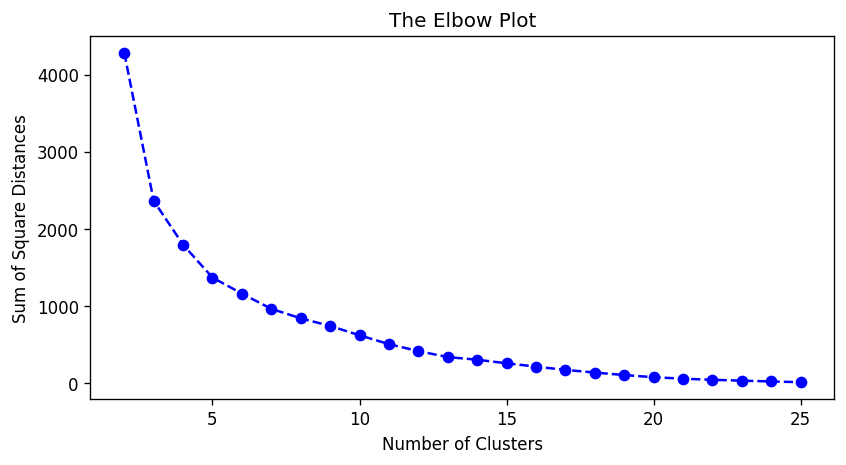

In [18]:
plt.figure(figsize=(8,4), dpi=120)
plt.title('The Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Square Distances')
_=plt.plot(k_list, k_inertias,'bo--')

## Silhouette Score 
Plot the so called "silhouette" score for the result of the K-Means clustering algorithm for the values of  𝑘  we implemented above. The silhouette score is a measure of how similar an object is to its cluster compared to other clusters

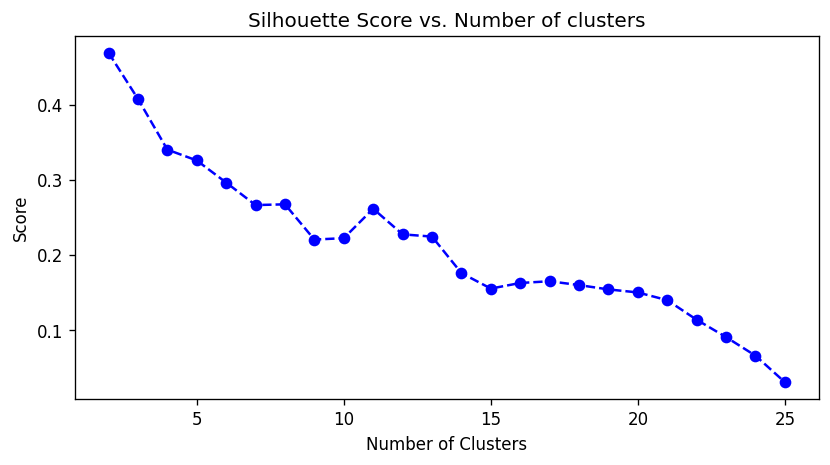

In [19]:
plt.figure(figsize=(8,4), dpi=120)
plt.title('Silhouette Score vs. Number of clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
_=plt.plot(k_list, k_scores,'bo--')